In [37]:
import pandas as pd
pd.options.display.max_rows = 10
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [38]:
data_inputs_train = pd.read_csv("loan_data_inputs_train.csv",index_col=0)
data_inputs_test = pd.read_csv("loan_data_inputs_test.csv",index_col=0)
data_targets_train = pd.read_csv("loan_data_targets_train.csv",index_col=0)
data_targets_test = pd.read_csv("loan_data_targets_test.csv",index_col=0)

In [39]:
ref_cat = pd.read_csv('ref_list.csv',header=None)

In [40]:
ref_lst = ref_cat[0]
ref_lst

0                                               grade:G
1                    home_ownership OTHER_ANY_RENT_NONE
2                      addr_state: ND_NE_IA_NV_FL_HI_AL
3                          verification_status:Verified
4     purpose educational_small_business_wedding_ren...
                            ...                        
13                                              dti:>35
14                                      term: 60 months
15                                     annual_inc:>140K
16                                    int_rate > 19.691
17                               initial_list_status:f'
Name: 0, Length: 18, dtype: object

In [41]:
for x in data_targets_train['good_bad_status'].unique():
     precentage = (data_targets_train['good_bad_status'].value_counts()[x] / data_targets_train['good_bad_status'].value_counts().sum()) *100
     print(f"{x} in train is {round(precentage,2)}%")

1 in train is 88.62%
0 in train is 11.38%


In [42]:
for x in data_targets_test['good_bad_status'].unique():
     precentage = (data_targets_test['good_bad_status'].value_counts()[x] / data_targets_test['good_bad_status'].value_counts().sum()) *100
     print(f"{x} in targets test is {round(precentage,2)}%")

1 in targets test is 88.37%
0 in targets test is 11.63%


In [43]:
df1 = pd.read_csv('data.csv',nrows=10)
df2 = data_inputs_train
columns1 = set(df1.columns)
columns2 = set(df2.columns)

In [44]:
diff = sorted(list(columns2.difference(columns1)))
diff = [col for col in diff if "_factor" not in col]

In [45]:
lst = []
for column in diff:
    if data_inputs_train[column].nunique() <= 2:
        lst.append(column)
    else:
        pass
    


In [46]:
patterns = ['sub_grade', 'loan_status']
lst = [elem for elem in lst if not any(re.findall('|'.join(patterns), elem))]
lst

['addr_state AR_MI_PA_OH_MN',
 'addr_state GA_WA_OR',
 'addr_state IL_CT',
 'addr_state KS_SC_CO_VT_AK_MS',
 'addr_state NM_VA',
 'addr_state OK_TN_MO_LA_MD_NC',
 'addr_state RI_MA_DE_SD_IN',
 'addr_state UT_KY_AZ_NJ',
 'addr_state WI_MT',
 'addr_state: ND_NE_IA_NV_FL_HI_AL',
 'addr_state: WV_NH_WY_DC_ME_ID',
 'addr_state:CA',
 'addr_state:NY',
 'addr_state:TX',
 'annual_inc:100K-120K',
 'annual_inc:120K-140K',
 'annual_inc:20K-30K',
 'annual_inc:30K-40K',
 'annual_inc:40K-50K',
 'annual_inc:50K-60K',
 'annual_inc:60K-70K',
 'annual_inc:70K-80K',
 'annual_inc:80K-90K',
 'annual_inc:90K-100K',
 'annual_inc:<20K',
 'annual_inc:>140K',
 'delinq_2yrs:0',
 'delinq_2yrs:1-3',
 'delinq_2yrs:>=4',
 'dti:1.4-3.5',
 'dti:10.5-16.1',
 'dti:16.1-20.3',
 'dti:20.3-21.7',
 'dti:21.7-22.4',
 'dti:22.4-35',
 'dti:3.5-7.7',
 'dti:7.7-10.5',
 'dti:<=1.4',
 'dti:>35',
 'emp_length:1-2',
 'emp_length:10+',
 'emp_length:3',
 'emp_length:4',
 'emp_length:5-7-9',
 'emp_length:6',
 'emp_length:8',
 'grade:A',

In [47]:
lst = sorted(list(set(lst) - set(ref_lst)))
lst

['addr_state AR_MI_PA_OH_MN',
 'addr_state GA_WA_OR',
 'addr_state IL_CT',
 'addr_state KS_SC_CO_VT_AK_MS',
 'addr_state NM_VA',
 'addr_state OK_TN_MO_LA_MD_NC',
 'addr_state RI_MA_DE_SD_IN',
 'addr_state UT_KY_AZ_NJ',
 'addr_state WI_MT',
 'addr_state: WV_NH_WY_DC_ME_ID',
 'addr_state:CA',
 'addr_state:NY',
 'addr_state:TX',
 'annual_inc:100K-120K',
 'annual_inc:120K-140K',
 'annual_inc:20K-30K',
 'annual_inc:30K-40K',
 'annual_inc:40K-50K',
 'annual_inc:50K-60K',
 'annual_inc:60K-70K',
 'annual_inc:70K-80K',
 'annual_inc:80K-90K',
 'annual_inc:90K-100K',
 'annual_inc:<20K',
 'delinq_2yrs:0',
 'delinq_2yrs:1-3',
 'dti:1.4-3.5',
 'dti:10.5-16.1',
 'dti:16.1-20.3',
 'dti:20.3-21.7',
 'dti:21.7-22.4',
 'dti:22.4-35',
 'dti:3.5-7.7',
 'dti:7.7-10.5',
 'dti:<=1.4',
 'emp_length:1-2',
 'emp_length:10+',
 'emp_length:3',
 'emp_length:4',
 'emp_length:5-7-9',
 'emp_length:6',
 'grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'home_ownership:MORTGAGE',
 'home_ownership:O

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [49]:
reg = LogisticRegression()

In [50]:
data_inputs_train = data_inputs_train.loc[:,lst]
data_inputs_train.columns

Index(['addr_state AR_MI_PA_OH_MN', 'addr_state GA_WA_OR', 'addr_state IL_CT',
       'addr_state KS_SC_CO_VT_AK_MS', 'addr_state NM_VA',
       'addr_state OK_TN_MO_LA_MD_NC', 'addr_state RI_MA_DE_SD_IN',
       'addr_state UT_KY_AZ_NJ', 'addr_state WI_MT',
       'addr_state: WV_NH_WY_DC_ME_ID', 'addr_state:CA', 'addr_state:NY',
       'addr_state:TX', 'annual_inc:100K-120K', 'annual_inc:120K-140K',
       'annual_inc:20K-30K', 'annual_inc:30K-40K', 'annual_inc:40K-50K',
       'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K',
       'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:<20K',
       'delinq_2yrs:0', 'delinq_2yrs:1-3', 'dti:1.4-3.5', 'dti:10.5-16.1',
       'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35',
       'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:<=1.4', 'emp_length:1-2',
       'emp_length:10+', 'emp_length:3', 'emp_length:4', 'emp_length:5-7-9',
       'emp_length:6', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E',
      

In [51]:
reg.fit(data_inputs_train,data_targets_train)

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
feature_name = data_inputs_train.columns.values

In [53]:
summary_table = pd.DataFrame(columns=['Feature Name'],data=feature_name)
summary_table['coeff'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,coeff
0,Intercept,-0.267628
1,addr_state AR_MI_PA_OH_MN,0.073246
2,addr_state GA_WA_OR,0.280808
3,addr_state IL_CT,0.201917
4,addr_state KS_SC_CO_VT_AK_MS,0.257551
...,...,...
93,purpose:credit_card,0.101861
94,purpose:debt_consolidation,0.017177
95,term: 36 months,0.114714
96,verification_status:Not Verified,0.355090


In [54]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegressionWithPValues:    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        

        denom = np.array(2.0 * (1.0 + np.cosh(self.model.decision_function(X))), dtype=float)
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T.astype(np.float32), X.astype(np.float32))
        
        Cramer_Rao = np.linalg.inv(F_ij)
        


        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values    
        

In [55]:
reg = LogisticRegressionWithPValues()
reg.fit(data_inputs_train,data_targets_train)

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
p_values = reg.p_values

In [57]:
p_values = np.append(np.nan,np.array(p_values))

In [58]:
summary_table = pd.DataFrame(columns=['Feature Name'],data=feature_name)
summary_table['coeff'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
pd.options.display.max_rows = None


In [59]:
summary_table['p_values'] = ["{:.7f}".format(p) for p in p_values]
pd.options.display.max_rows = None

In [60]:
import re
summary_lst = ['pub_rec', 'open_acc', 'delinq_2yrs']
pattern = '|'.join(summary_lst)
summary_table = summary_table[~summary_table['Feature Name'].str.contains(pattern, flags=re.IGNORECASE)].reset_index()


In [61]:
summary_table

,index,Feature Name,coeff,p_values
0,0,Intercept,-0.267628,nan
1,1,addr_state AR_MI_PA_OH_MN,0.073246,0.0130701
2,2,addr_state GA_WA_OR,0.280808,0.0000000
3,3,addr_state IL_CT,0.201917,0.0000001
4,4,addr_state KS_SC_CO_VT_AK_MS,0.257551,0.0000000
5,5,addr_state NM_VA,-0.003051,0.9448805
6,6,addr_state OK_TN_MO_LA_MD_NC,0.015514,0.6091424
7,7,addr_state RI_MA_DE_SD_IN,0.096666,0.0134848
8,8,addr_state UT_KY_AZ_NJ,0.066009,0.0464067
9,9,addr_state WI_MT,0.182052,0.0036511


In [62]:
ref_lst = [e for e in ref_lst if not re.search(pattern, e)]

In [63]:
data_inputs_train = data_inputs_train.drop(columns=data_inputs_train.columns[data_inputs_train.columns.str.contains(pattern, flags=re.IGNORECASE)])
data_inputs_train.columns.values

array(['addr_state AR_MI_PA_OH_MN', 'addr_state GA_WA_OR',
       'addr_state IL_CT', 'addr_state KS_SC_CO_VT_AK_MS',
       'addr_state NM_VA', 'addr_state OK_TN_MO_LA_MD_NC',
       'addr_state RI_MA_DE_SD_IN', 'addr_state UT_KY_AZ_NJ',
       'addr_state WI_MT', 'addr_state: WV_NH_WY_DC_ME_ID',
       'addr_state:CA', 'addr_state:NY', 'addr_state:TX',
       'annual_inc:100K-120K', 'annual_inc:120K-140K',
       'annual_inc:20K-30K', 'annual_inc:30K-40K', 'annual_inc:40K-50K',
       'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K',
       'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:<20K',
       'dti:1.4-3.5', 'dti:10.5-16.1', 'dti:16.1-20.3', 'dti:20.3-21.7',
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:3.5-7.7', 'dti:7.7-10.5',
       'dti:<=1.4', 'emp_length:1-2', 'emp_length:10+', 'emp_length:3',
       'emp_length:4', 'emp_length:5-7-9', 'emp_length:6', 'grade:A',
       'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:M

In [64]:
reg2 = LogisticRegressionWithPValues()
reg2.fit(data_inputs_train,data_targets_train)

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
FN = data_inputs_train.columns.values

In [66]:
summary_table = pd.DataFrame(columns=['Feature Name'],data=FN)
summary_table['coeff'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,coeff
0,Intercept,-0.205236
1,addr_state AR_MI_PA_OH_MN,0.070368
2,addr_state GA_WA_OR,0.279523
3,addr_state IL_CT,0.199007
4,addr_state KS_SC_CO_VT_AK_MS,0.256364
5,addr_state NM_VA,-0.000119
6,addr_state OK_TN_MO_LA_MD_NC,0.014877
7,addr_state RI_MA_DE_SD_IN,0.094744
8,addr_state UT_KY_AZ_NJ,0.064550
9,addr_state WI_MT,0.184424


In [67]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = ["{:.7f}".format(p) for p in p_values]
summary_table

,Feature Name,coeff,p_values
0,Intercept,-0.205236,nan
1,addr_state AR_MI_PA_OH_MN,0.070368,0.0170619
2,addr_state GA_WA_OR,0.279523,0.0000000
3,addr_state IL_CT,0.199007,0.0000002
4,addr_state KS_SC_CO_VT_AK_MS,0.256364,0.0000000
5,addr_state NM_VA,-0.000119,0.9978556
6,addr_state OK_TN_MO_LA_MD_NC,0.014877,0.6237817
7,addr_state RI_MA_DE_SD_IN,0.094744,0.0154218
8,addr_state UT_KY_AZ_NJ,0.064550,0.0514203
9,addr_state WI_MT,0.184424,0.0032389


In [ ]:
data_inputs_test = data_inputs_test.loc[:,lst]
data_inputs_test = data_inputs_test.drop(columns=data_inputs_test.columns[data_inputs_test.columns.str.contains(pattern, flags=re.IGNORECASE)])

In [ ]:
y_hat_test = reg2.model.predict(data_inputs_test)

In [ ]:
y_hat_test_proba = reg2.model.predict_proba(data_inputs_test)

In [ ]:
y_hat_test_proba

array([[0.0386682 , 0.9613318 ],
       [0.22257086, 0.77742914],
       [0.06496619, 0.93503381],
       ...,
       [0.16777773, 0.83222227],
       [0.12643823, 0.87356177],
       [0.06304005, 0.93695995]])

In [ ]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [ ]:
data_targets_test_temp = data_targets_test

In [ ]:
data_targets_test_temp.reset_index(drop=True,inplace=True)
df_actual_predicted_probs = pd.concat([data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)

In [ ]:
df_actual_predicted_probs.shape

(53009, 2)

In [ ]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [ ]:
df_actual_predicted_probs.index = data_inputs_test.index

In [ ]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
119536,1,0.961332
226724,1,0.777429
84871,1,0.935034
134254,1,0.842538
124153,0,0.898995


In [ ]:
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] >= .5, 1,0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames=['Actuals'],colnames=['Predicted']) 

Predicted,0,1
Actuals,,
0,60,6103
1,59,46787


In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames=['Actuals'],colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actuals,,
0,0.001132,0.115131
1,0.001113,0.882624


In [ ]:
(pd.crosstab(
    df_actual_predicted_probs['loan_data_targets_test'],
    df_actual_predicted_probs['y_hat_test'],rownames=['Actuals'],colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames=['Actuals'],colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.8837555886736215

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

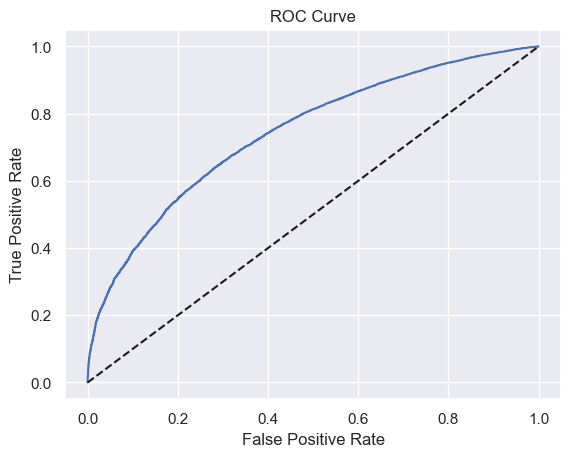

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [ ]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7435856574916772

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values("y_hat_test_proba")

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [ ]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index+1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population']- df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [ ]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / (df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs['Cumulative Perc Baf'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0]-df_actual_predicted_probs['loan_data_targets_test'].sum())

Text(0.5, 1.0, 'GINI')

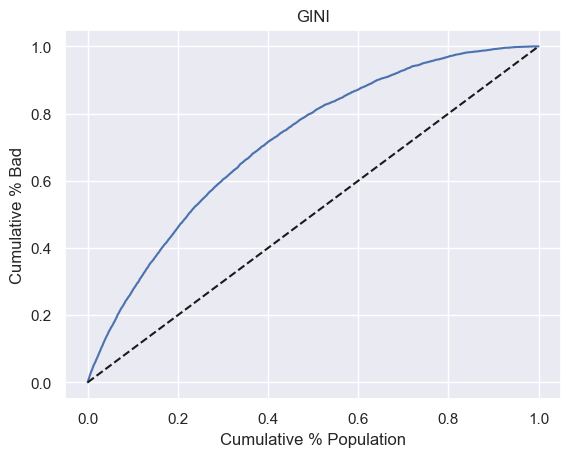

In [ ]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Baf'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'],linestyle='--',color='k')
plt.xlabel("Cumulative % Population")
plt.ylabel("Cumulative % Bad")
plt.title("GINI")

In [ ]:
Gini = AUROC * 2 -1
Gini

0.4871713149833543

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

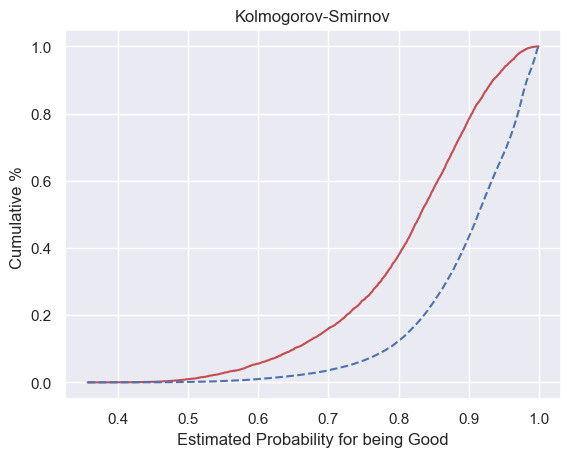

In [ ]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Baf'],color='r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Good'],linestyle='--',color='b')
plt.xlabel("Estimated Probability for being Good")
plt.ylabel("Cumulative % ")
plt.title("Kolmogorov-Smirnov")

In [ ]:
ks = max(df_actual_predicted_probs['Cumulative Perc Baf'] - df_actual_predicted_probs['Cumulative Perc Good'])
ks

0.35756667361176786

In [ ]:
df_ref_cat = pd.DataFrame(ref_lst,columns=['Feature Name'])
df_ref_cat['coeff'] = 0
df_ref_cat['p_values'] = np.nan
df_ref_cat

,Feature Name,coeff,p_values
0,grade:G,0,NaN
1,home_ownership OTHER_ANY_RENT_NONE,0,NaN
2,addr_state: ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose educational_small_business_wedding_ren...,0,NaN
5,emp_length:8,0,NaN
6,mnths_since_issued_d > 69,0,NaN
7,mnths_since_earliest_cr_line > 488,0,NaN
8,inq_last_6mths:>6,0,NaN
9,mths_since_last_delinq:Missing,0,NaN


In [ ]:
df_scorecard = pd.concat([summary_table,df_ref_cat])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature Name,coeff,p_values
0,0,Intercept,-0.205236,nan
1,1,addr_state AR_MI_PA_OH_MN,0.070368,0.0170619
2,2,addr_state GA_WA_OR,0.279523,0.0000000
3,3,addr_state IL_CT,0.199007,0.0000002
4,4,addr_state KS_SC_CO_VT_AK_MS,0.256364,0.0000000
5,5,addr_state NM_VA,-0.000119,0.9978556
6,6,addr_state OK_TN_MO_LA_MD_NC,0.014877,0.6237817
7,7,addr_state RI_MA_DE_SD_IN,0.094744,0.0154218
8,8,addr_state UT_KY_AZ_NJ,0.064550,0.0514203
9,9,addr_state WI_MT,0.184424,0.0032389


In [ ]:
df_scorecard['Original Feature Name'] = df_scorecard['Feature Name'].str.split(' |:', n=1).str[0]
df_scorecard

,index,Feature Name,coeff,p_values,Original Feature Name
0,0,Intercept,-0.205236,nan,Intercept
1,1,addr_state AR_MI_PA_OH_MN,0.070368,0.0170619,addr_state
2,2,addr_state GA_WA_OR,0.279523,0.0000000,addr_state
3,3,addr_state IL_CT,0.199007,0.0000002,addr_state
4,4,addr_state KS_SC_CO_VT_AK_MS,0.256364,0.0000000,addr_state
5,5,addr_state NM_VA,-0.000119,0.9978556,addr_state
6,6,addr_state OK_TN_MO_LA_MD_NC,0.014877,0.6237817,addr_state
7,7,addr_state RI_MA_DE_SD_IN,0.094744,0.0154218,addr_state
8,8,addr_state UT_KY_AZ_NJ,0.064550,0.0514203,addr_state
9,9,addr_state WI_MT,0.184424,0.0032389,addr_state


In [ ]:
min_score = 300
max_score = 850

In [ ]:
df_scorecard.groupby("Original Feature Name")['coeff'].min()

Original Feature Name
Intercept                      -0.205236
addr_state                     -0.014709
annual_inc                     -0.352700
dti                            -0.229091
emp_length                      0.000000
grade                           0.000000
home_ownership                  0.000000
initial_list_status            -0.172405
inq_last_6mths                  0.000000
int_rate                       -0.606250
mnths_since_earliest_cr_line    0.000000
mnths_since_issued_d            0.000000
mths_since_last_delinq         -0.042840
mths_since_last_record         -0.433912
purpose                         0.000000
term                            0.000000
verification_status             0.000000
Name: coeff, dtype: float64

In [ ]:
min_sun_coef = df_scorecard.groupby("Original Feature Name")['coeff'].min().sum()
min_sun_coef

-2.057144761967253

In [ ]:
max_sun_coef = df_scorecard.groupby("Original Feature Name")['coeff'].max().sum()
max_sun_coef

8.57150513321558

In [ ]:
df_scorecard['Score'] = df_scorecard['coeff'] *(max_score-min_score) / (max_sun_coef-min_sun_coef)
df_scorecard

,index,Feature Name,coeff,p_values,Original Feature Name,Score
0,0,Intercept,-0.205236,nan,Intercept,-10.620349
1,1,addr_state AR_MI_PA_OH_MN,0.070368,0.0170619,addr_state,3.641332
2,2,addr_state GA_WA_OR,0.279523,0.0000000,addr_state,14.464482
3,3,addr_state IL_CT,0.199007,0.0000002,addr_state,10.298020
4,4,addr_state KS_SC_CO_VT_AK_MS,0.256364,0.0000000,addr_state,13.266075
5,5,addr_state NM_VA,-0.000119,0.9978556,addr_state,-0.006140
6,6,addr_state OK_TN_MO_LA_MD_NC,0.014877,0.6237817,addr_state,0.769843
7,7,addr_state RI_MA_DE_SD_IN,0.094744,0.0154218,addr_state,4.902693
8,8,addr_state UT_KY_AZ_NJ,0.064550,0.0514203,addr_state,3.340286
9,9,addr_state WI_MT,0.184424,0.0032389,addr_state,9.543363


In [ ]:
df_scorecard['Score Preliminary'] = df_scorecard['Score'].round()
df_scorecard

,index,Feature Name,coeff,p_values,Original Feature Name,Score,Score Preliminary
0,0,Intercept,-0.205236,nan,Intercept,-10.620349,-11.0
1,1,addr_state AR_MI_PA_OH_MN,0.070368,0.0170619,addr_state,3.641332,4.0
2,2,addr_state GA_WA_OR,0.279523,0.0000000,addr_state,14.464482,14.0
3,3,addr_state IL_CT,0.199007,0.0000002,addr_state,10.298020,10.0
4,4,addr_state KS_SC_CO_VT_AK_MS,0.256364,0.0000000,addr_state,13.266075,13.0
5,5,addr_state NM_VA,-0.000119,0.9978556,addr_state,-0.006140,-0.0
6,6,addr_state OK_TN_MO_LA_MD_NC,0.014877,0.6237817,addr_state,0.769843,1.0
7,7,addr_state RI_MA_DE_SD_IN,0.094744,0.0154218,addr_state,4.902693,5.0
8,8,addr_state UT_KY_AZ_NJ,0.064550,0.0514203,addr_state,3.340286,3.0
9,9,addr_state WI_MT,0.184424,0.0032389,addr_state,9.543363,10.0


In [ ]:
df_scorecard['diff'] = df_scorecard['Score Preliminary'] - df_scorecard['Score']
df_scorecard

,index,Feature Name,coeff,p_values,Original Feature Name,Score,Score Preliminary,diff
0,0,Intercept,-0.205236,nan,Intercept,-10.620349,-11.0,-0.379651
1,1,addr_state AR_MI_PA_OH_MN,0.070368,0.0170619,addr_state,3.641332,4.0,0.358668
2,2,addr_state GA_WA_OR,0.279523,0.0000000,addr_state,14.464482,14.0,-0.464482
3,3,addr_state IL_CT,0.199007,0.0000002,addr_state,10.298020,10.0,-0.298020
4,4,addr_state KS_SC_CO_VT_AK_MS,0.256364,0.0000000,addr_state,13.266075,13.0,-0.266075
5,5,addr_state NM_VA,-0.000119,0.9978556,addr_state,-0.006140,-0.0,0.006140
6,6,addr_state OK_TN_MO_LA_MD_NC,0.014877,0.6237817,addr_state,0.769843,1.0,0.230157
7,7,addr_state RI_MA_DE_SD_IN,0.094744,0.0154218,addr_state,4.902693,5.0,0.097307
8,8,addr_state UT_KY_AZ_NJ,0.064550,0.0514203,addr_state,3.340286,3.0,-0.340286
9,9,addr_state WI_MT,0.184424,0.0032389,addr_state,9.543363,10.0,0.456637


In [ ]:
df_scorecard['Score-Final'] = df_scorecard['Score Preliminary']
df_scorecard['Score-Final'][68] = 150

C:\Users\Amr\AppData\Local\Temp\ipykernel_5356\2259942553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Final'][68] = 150


In [ ]:
min_sun_score_pre1 = df_scorecard.groupby("Original Feature Name")['Score Preliminary'].min().sum()
max_sun_score_pre1 = df_scorecard.groupby("Original Feature Name")['Score Preliminary'].max().sum()
min_sun_score_pre1,max_sun_score_pre1

(-106.0, 444.0)

In [ ]:
df_scorecard

,index,Feature Name,coeff,p_values,Original Feature Name,Score,Score Preliminary,diff,Score-Final
0,0,Intercept,-0.205236,nan,Intercept,-10.620349,-11.0,-0.379651,-11.0
1,1,addr_state AR_MI_PA_OH_MN,0.070368,0.0170619,addr_state,3.641332,4.0,0.358668,4.0
2,2,addr_state GA_WA_OR,0.279523,0.0000000,addr_state,14.464482,14.0,-0.464482,14.0
3,3,addr_state IL_CT,0.199007,0.0000002,addr_state,10.298020,10.0,-0.298020,10.0
4,4,addr_state KS_SC_CO_VT_AK_MS,0.256364,0.0000000,addr_state,13.266075,13.0,-0.266075,13.0
5,5,addr_state NM_VA,-0.000119,0.9978556,addr_state,-0.006140,-0.0,0.006140,-0.0
6,6,addr_state OK_TN_MO_LA_MD_NC,0.014877,0.6237817,addr_state,0.769843,1.0,0.230157,1.0
7,7,addr_state RI_MA_DE_SD_IN,0.094744,0.0154218,addr_state,4.902693,5.0,0.097307,5.0
8,8,addr_state UT_KY_AZ_NJ,0.064550,0.0514203,addr_state,3.340286,3.0,-0.340286,3.0
9,9,addr_state WI_MT,0.184424,0.0032389,addr_state,9.543363,10.0,0.456637,10.0
